## implement K-means clustering from scratch in Python

_To inplement K-means Clustering from scratch, 3 questions have to be answered:_
- **First, how does the algorithm find the centroid of each cluster?**
> To be concrete, suppose we want to group out data into 5 groups, we start from 5 initial data points, how did
these 5 points finally arrived the most probable centroid of each cluster?
- **Second, how to determine the optimum number of clusters?**
> If we have no a prior knowledge of our data, how can we assert that out data should group into 5, 6, or 7 groups?
what is the optimum value of K?
- **Third, how to initialize centroids?**
> Suppose we have already find a resonable way to determine the optimum K value. how should we choose the initial K data point? Is randomly selection a good choice?

_@PZC Apr 29, 2019

In [27]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import random as rd

In [147]:
# 1. Load dataset
file_path = "Mall_Customers.csv"
dataset = pd.read_csv(file_path)
# dataset.describe()

In [18]:
# taking 'Annual Income' and 'Spending Score' as our data
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

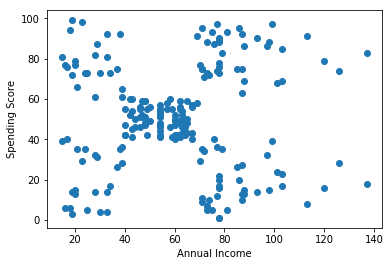

In [39]:
# versualising the dataset
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [103]:
# 2. Set iteration times
m = X.shape[0]  # vertical axis, represents numbers in a raw; thus m is numbers of training examples
n = X.shape[1]  # horizontal axis, represents numbers in a column; thus n is numbers of features/labels
n_iter = 200  # set iteration times

In [22]:
# 3. Set the number of clusters
K = 5 # That's how many clusters you want to cluster the dataset into.

In [105]:
# 4. K-means Clustering steps
# 4.1 Initialize the centroids randomly from the data points (random is always not a good choice)
# centriods is a nxK matrix (n is the number of features that describes a single data points, n=2 here.)
Centroids = np.array([]).reshape(n, 0) # init the nparray, 2 raws 0 column empty array
for i in range(K):
    rand = rd.randint(0, m-1)  # choose a raw index randomly
    Centroids = np.c_[Centroids, X[rand]]  # concatentate alone the horizontal orientation (axis 1)
print(Centroids)

[[ 65.  20.  62. 120.  43.]
 [ 48.  13.  42.  79.  41.]]


In [33]:
# 4.2 Find the true Centroids starting from the randomly chosen points (here's the Core Algrithm of Kmeans)
# 4.2a  For each training example compute the euclidian distance from the centroid and assign the cluster based 
#         on the minimal distance

# the output is a dictionary with cluster number (K) as Keys and the data points which belong to that cluster as values
Output  = {}

array([[85., 77., 69., 67., 40.],
       [75., 74., 91., 57., 42.]])

In [50]:
# sine we calculate the euc_dist from every data points (m) to every Centroids (K), 
# we eventually get a mxK matrix which store all the euc_dists
euc_dist = np.array([]).reshape(m, 0)  # euc_dist --> euclidian distance
for k in range(K):
    temp_dist = np.sum((X - Centroids[:, k]) ** 2, axis=1)
    euc_dist = np.c_[euc_dist, temp_dist]
# for each points (raw), now K (K=5 here) euc_dists are attatched to it. 
# we should find the minimal dist in the 5 dists and which will ditermine its temporal cluster.
# since np.argmin() returns the indices of the minimum values along an axis, this can simply tell us each 
# data points belongs to which cluster in the 5 clusters in current iteration.
C = np.argmin(euc_dist, axis=1) + 1
print('euc_dist shape: {} \nCluster index (C) shape: {}'. format(euc_dist.shape, C.shape))

euc_dist shape: (200, 5) 
Cluster index (C) shape: (200,)


In [86]:
# 4.2b Adjust the centroid of each cluster by taking the average of all the data points 
#       which belong to that cluster on the basis of the computations performed in step 4.2a.
# to be concrete, we have 200 data points, and they have grouped into 5 groups in step 4.2a, 
# for example, C1, 40 data points; C2, 50; C3, 30; C4, 30; C5, 50. 
# to adjuct centroids according to the average (avg in every demension of features) in each 
# cluster, we should first regroup the Cluster Index (C) obtained in step 4.2a
Y = {}
for k in range(K):
    Y[k+1] = np.array([]).reshape(2, 0)  # Cluster index is starting from 1 not 0, that why k + 1
for i in range(m):
    Y[C[i]] = np.c_[Y[C[i]], X[i]] # store all points that belong to cluster C[i] in to Y[C[i]], C[i] = 1, 2, 3, 4, 5

for k in range(K):
    Y[k+1] = Y[k+1].T  # transpose to column verctor
for k in range(K):
    Centroids[:, k] = np.mean(Y[k+1], axis=0) # calculate the mean (in every feature demension) in each cluster
                                                              # and obtain new Centroids

array([41.07042254, 41.70422535])

In [106]:
# (step 4.2a + 4.2b) is one single iteration step, now we put it into the iteration loop
for i in range(n_iter):
    # step 4.2a
    Output = {}
    euc_dist = np.array([]).reshape(m, 0)  # euc_dist --> euclidian distance
    for k in range(K):
        temp_dist = np.sum((X - Centroids[:, k]) ** 2, axis=1)
        euc_dist = np.c_[euc_dist, temp_dist]   
    C = np.argmin(euc_dist, axis=1) + 1
    # step 4.2b
    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(2, 0)  
    for i in range(m):
        Y[C[i]] = np.c_[Y[C[i]], X[i]] 

    for k in range(K):
        Y[k+1] = Y[k+1].T
    for k in range(K):
        Centroids[:, k] = np.mean(Y[k+1], axis=0)
    Output = Y

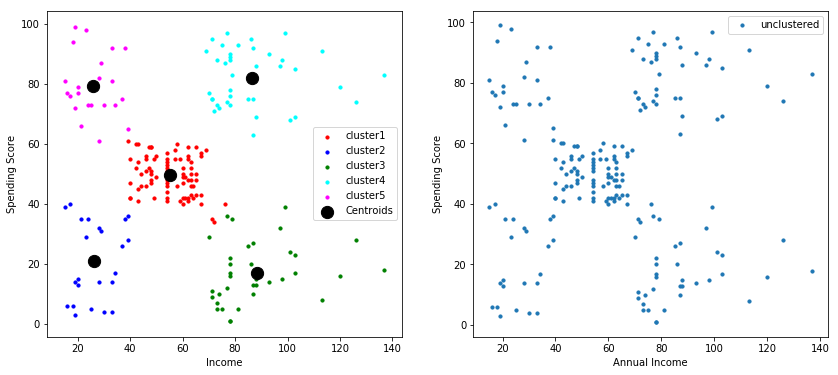

In [119]:
# 5. visualising the clustered data after 100 iterations
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
for k in range(K):
    ax1.scatter(Output[k+1][:, 0], Output[k+1][:, 1], c=color[k], s=10, label=labels[k])
ax1.scatter(Centroids[0, :], Centroids[1, :], s=150, c='black', label='Centroids')
ax1.set_xlabel('Income')
ax1.set_ylabel('Spending Score')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X[:, 0], X[:, 1], s=10, label='unclustered')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')
ax2.legend()
plt.show()

In [128]:
# An important quesiton remains to be answered is that :
# How Do We Know We Should Group Our Data into 5 Clusters?
# or we should define: what is an appropriate K value?
# The Answer: 
# "Sum of squares of distances of every data point from its corresponding cluster centroid 
# should be as minimum as possible"
# we further define "sum of squares of distance of every data point from its corresponding
# cluster centroid" as WCSS (Within-Cluster Sum of Sqares)

In [129]:
# With the definition of WCSS, we can use an Algorithm called ELBOW
# to fine the appropriate K value
# To be brief, we have a plot which has an x_axis of 'K' and a y_axis of 'WCSS', 
# the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [ ]:
# To implement the ELBOW algorithm, we change the core K-means code into an object-oriented manner

In [138]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random as rd

class Kmeans:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.Output = {}
        self.m = self.X.shape[0] # dimension of every feature
        self.Centroids = np.array([]).reshape(self.X.shape[1], 0)

    def fit(self, n_iter):
        self.Centroids = np.array([]).reshape(n, 0)
        for i in range(K):
            rand = rd.randint(0, m-1)
            self.Centroids = np.c_[self.Centroids, X[rand]]

        for i in range(n_iter):
            # step a
            euc_dist = np.array([]).reshape(m, 0)
            for k in range(K):
                temp_dist = np.sum((X - self.Centroids[:, k]) ** 2, axis=1)
                euc_dist = np.c_[euc_dist, temp_dist]
            C = np.argmin(euc_dist, axis=1) + 1
            # step b
            Y = {}
            for k in range(K):
                Y[k+1] = np.array([]).reshape(2, 0)
            for i in range(m):
                Y[C[i]] = np.c_[Y[C[i]], X[i]]

            for k in range(K):
                Y[k+1] = Y[k+1].T
            for k in range(K):
                self.Centroids[:, k] = np.mean(Y[k+1], axis=0)
        self.Output = Y
        
    def draw_result(self):
        fig = plt.figure(figsize=(14, 6))
        ax1 = plt.subplot(1, 2, 1)
        color = ['red', 'blue', 'green', 'cyan', 'magenta', 'black', 'orange', 'purple', 'quartz', 'peru']
        labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10']
        for k in range(K):
            ax1.scatter(self.Output[k+1][:, 0], self.Output[k+1][:, 1], c=color[k], s=10, label=labels[k])
        ax1.scatter(self.Centroids[0, :], self.Centroids[1, :], s=150, c='black', label='Centroids')
        ax1.set_xlabel('Income')
        ax1.set_ylabel('Spending Score')
        ax1.legend()
        ax1.set_title('K = ' + str(K))

        ax2 = plt.subplot(1, 2, 2)
        ax2.scatter(X[:, 0], X[:, 1], s=10, label='unclustered')
        ax2.set_xlabel('Annual Income')
        ax2.set_ylabel('Spending Score')
        ax2.legend()
        plt.show()
        
    def predict(self):
        return self.Output, self.Centroids.T

In [142]:
file_path = "Mall_Customers.csv"
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, [3, 4]].values

m = X.shape[0]
n = X.shape[1]
n_iter = 300

# K = 5

In [140]:
kmeans = Kmeans(X, K)
kmeans.fit(n_iter)

In [141]:
kmeans.predict()[1]

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

In [126]:
# kmeans.draw_result()

In [143]:
WCSS_array=np.array([])
for K in range(1,11): # suppose we set K = 1, 2, ..., 10
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

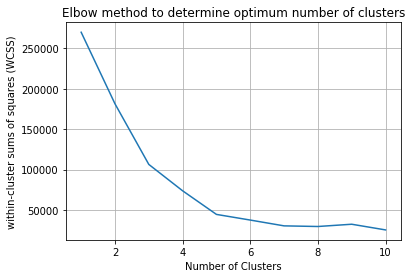

In [145]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.grid()
plt.show()
# inspecting the figure below, decreasing of WCSS becomes marginal after K = 5
# thus we should cluster our dataset into 5 clusters

In [146]:
# Finally, once the number of clusters is determined,
# How Should We Initialize These Centroids? (the initial position of these centroids)
# Choose position of centroids randomly will always cause additional computation time

# This problem can be solved by the "Kmeans ++ Initialization Algorithm"
# detailed description of this algorithm can be found on Wikipedia
# its basically consist of the following steps:

In [170]:
# step 1
# Randomly select the first cluster center from the data points and append it to the centroid matrix.
i = rd.randint(0, X.shape[0])  # axis 0 is the number of samples
Centroid = np.array([X[i]])  
print(Centroid)

[[65 50]]


In [171]:
# step 2
# loop from the first K to the last K
# we will do this latter

In [172]:
# step3
# for each data point, calculate the euclidian distance square from already chosen centroids (1 centroid have chosen now)
# and append the minimum distance to the Distance array
D = np.array([])
for x in X:
    D = np.append(D, np.min(np.sum((x - Centroid) ** 2)))
D.shape

(200,)

In [173]:
# step 4
# Calculate the probabilities of choosing the particular data point as the next centroid by dividing the 
# Distance array elements with the sum of Distance array.
prob = D/np.sum(D)


In [174]:
# step 5
cummulative_prob = np.cumsum(prob)

In [ ]:
# step 6
# select a random number between 0 to 1
r = rd.random()
i = 0
for j, p in enumerate(cummulative_prob):
    if r < p:
        i = j
        break
Centroid = np.append(Centroid, [X[i]], axis=0)

In [198]:
# Let's putting the above 6 steps into a for loop of K clusters
i = rd.randint(0,X.shape[0])
Centroid_kpp = np.array([X[i]])
K = 5
for k in range(1,K):
    D = np.array([]) 
    for x in X:
        D = np.append(D,np.min(np.sum((x-Centroid_kpp)**2)))
    prob = D/np.sum(D)
    cummulative_prob = np.cumsum(prob)
    r = rd.random()
    i = 0
    for j,p in enumerate(cummulative_prob):
        if r < p:
            i = j
            break
    Centroid_kpp = np.append(Centroid_kpp,[X[i]],axis=0)
# print(Centroid_kpp)

In [211]:
Centroid_rand = np.array([]).reshape(0, X.shape[1]) 
for i in range(K):
    rand = rd.randint(0, m-1)  
    Centroid_rand = np.append(Centroid_rand, [X[rand]], axis=0)
# print(Centroids_rand.T)

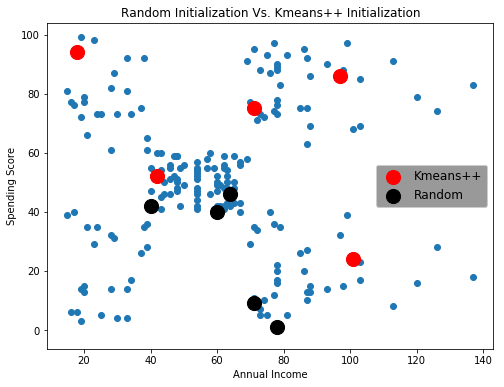

In [285]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Centroid_kpp[:, 0], Centroid_kpp[:, 1], s=200, color='red', label='Kmeans++')
plt.scatter(Centroid_rand[:, 0], Centroid_rand[:, 1], s=200, color='black', label='Random')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(fontsize='12', facecolor='gray')
plt.title('Random Initialization Vs. Kmeans++ Initialization')
plt.show()

In [179]:
x1 = np.array([2, 4])
x2 = np.array([[11, 2], [15, 7], [4, 13], [0, 10]])

In [185]:
np.min(np.sum((x1 - x2) ** 2))

388

In [ ]:
# Finally, we merge Centroid Initialization and Optimun Number of Cluster Algorithm into the core algorithm
# of K-means clustering

In [294]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random as rd

class Kmeans:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.Output = {}
        self.m = self.X.shape[0] # dimension of every feature
        self.Centroids = np.array([]).reshape(self.X.shape[1], 0)

    def kmeanspp(self, X, K):
        i = rd.randint(0,X.shape[0])
        Centroid_kpp = np.array([X[i]])
        for k in range(1,K):
            D = np.array([]) 
            for x in X:
                D = np.append(D,np.min(np.sum((x-Centroid_kpp)**2)))
            prob = D/np.sum(D)
            cummulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j,p in enumerate(cummulative_prob):
                if r < p:
                    i = j
                    break
            Centroid_kpp = np.append(Centroid_kpp,[X[i]],axis=0)      
        return Centroid_kpp.T
        
    def fit(self, n_iter):
        self.Centroids = self.kmeanspp(self.X, self.K)
#         we don't use random initialization anymore
#         self.Centroids = np.array([]).reshape(n, 0)
#         for i in range(K):
#             rand = rd.randint(0, m-1)
#             self.Centroids = np.c_[self.Centroids, X[rand]]

        for i in range(n_iter):
            # step a
            euc_dist = np.array([]).reshape(m, 0)
            for k in range(K):
                temp_dist = np.sum((X - self.Centroids[:, k]) ** 2, axis=1)
                euc_dist = np.c_[euc_dist, temp_dist]
            C = np.argmin(euc_dist, axis=1) + 1
            # step b
            Y = {}
            for k in range(K):
                Y[k+1] = np.array([]).reshape(2, 0)
            for i in range(m):
                Y[C[i]] = np.c_[Y[C[i]], X[i]]

            for k in range(K):
                Y[k+1] = Y[k+1].T
            for k in range(K):
                self.Centroids[:, k] = np.mean(Y[k+1], axis=0)
            self.Output = Y
        
    def draw_result(self):
        fig = plt.figure(figsize=(14, 6))
        ax1 = plt.subplot(1, 2, 1)
        color = ['red', 'blue', 'green', 'cyan', 'magenta', 'black', 'orange', 'purple', 'gray', 'pink']
        labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10']
        for k in range(K):
            ax1.scatter(self.Output[k+1][:, 0], self.Output[k+1][:, 1], c=color[k], s=10, label=labels[k])
        ax1.scatter(self.Centroids[0, :], self.Centroids[1, :], s=150, c='black', label='Centroids')
        ax1.set_xlabel('Income')
        ax1.set_ylabel('Spending Score')
        ax1.legend()
        ax1.set_title('K = ' + str(K))

        ax2 = plt.subplot(1, 2, 2)
        ax2.scatter(X[:, 0], X[:, 1], s=10, label='unclustered')
        ax2.set_xlabel('Annual Income')
        ax2.set_ylabel('Spending Score')
        ax2.legend()
        plt.show()
        
    def predict(self):
        return self.Output, self.Centroids.T
    
    def WCSS(self):
        wcss = 0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)        
        return wcss

In [295]:
file_path = "Mall_Customers.csv"
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, [3, 4]].values

m = X.shape[0]
n = X.shape[1]
n_iter = 300
K = 5

In [296]:
kmeans = Kmeans(X, K)

In [299]:
kmeans.fit(n_iter)

In [291]:
kmeans.predict()[1]

array([[48, 56],
       [87, 18],
       [86, 82],
       [30, 35],
       [24,  9]])

In [292]:
kmeans.WCSS()

70252.0

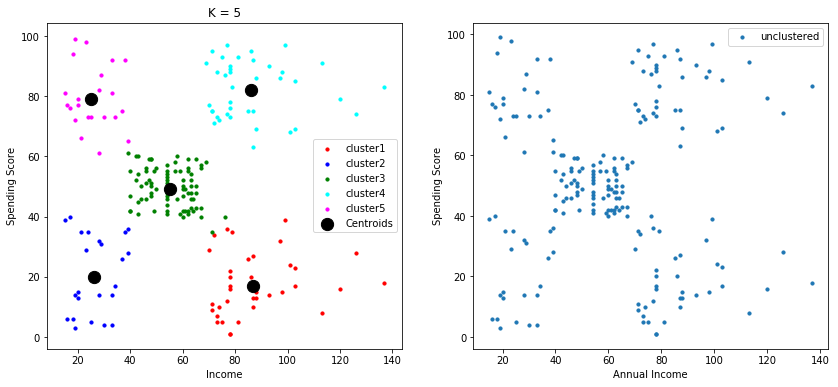

In [300]:
kmeans.draw_result()

In [274]:
K_end = 11
n_iter = 200
WCSS_array = np.array([])
for K in range(1, K_end):
    kmeans = Kmeans(X, K)
    kmeans.fit(n_iter)
    WCSS_array = np.append(WCSS_array, kmeans.WCSS())


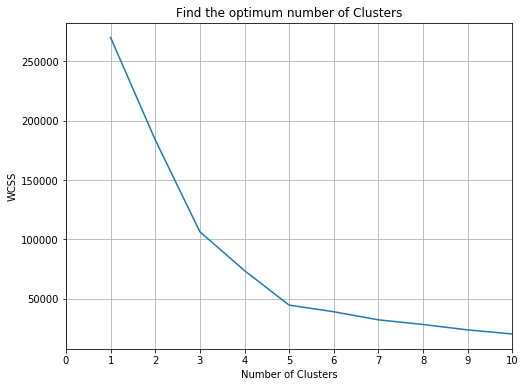

In [281]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11), WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Find the optimum number of Clusters')
plt.xticks([i for i in range(0, 11)])
plt.xlim(0, 10)
plt.grid()
plt.show()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])